## Pima Indians Diabetes Database
__Predict the onset of diabetes based on diagnostic measures__

### Context
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

### Content
The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

### Inspiration
Can you build a machine learning model to accurately predict whether or not the patients in the dataset have diabetes or not?

### About the Feature Columns:
1. **Pregnancies** - Number of times pregnant

2. **Glucose** - Plasma glucose concentration at 2 hours in an oral glucose tolerance test

3. **BloodPressure** - Diastolic blood pressure (mm Hg)

4. **SkinThickness** - Triceps skin fold thickness (mm)

5. **Insulin** - 2-Hour serum insulin (mu U/ml) ; levels of insulin in serum 2 hours post administration of Glucose.

6. **BMI** - Body mass index (weight(kg)/(height(m^2))

7. **DiabetesPedigreeFunction** - indicates the function which scores likelihood of diabetes based on family history.

8. **Age** - Age (years)

9. **Outcome** - Class variable (0 or 1) 268 of 768 are 1, the others are 0
 * 1 - diabetic

 * 0 - non-diabetic

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_rows = 100
plt.style.use('seaborn-darkgrid')
c1 = ['palevioletred','teal']
c2 = ['palevioletred','yellowgreen']
c3 = ['thistle','paleturquoise']

In [2]:
df = pd.read_csv("Data/diabetes.csv")

In [3]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


__We can see from here that there are no null values__

In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**Points to note over here:**
* the minimum value for a lot of variable including blood glucose level, blood pressure, skin thickness, and BMI is 0, which seems odd..we need to analyse further to determine whether these zero values are biologically acceptable and if not then we will consider them as Nan, and impute accordingly.
* there is a lot of range difference in the feature columns and so we will need to standardise if we want to apply linear models.

Everything else seems to be alright.

## I. Exploring Columns with Zero values
**Since many variables show zero values for some samples, we will explore this thoroughly in order to deduce whether the presence of zero values make logical sense for any of those variables before deciding on considering them as missing values.**

### 1. Blood Glucose levels

Blood Glucose levels of lower than 70mg/dL is considered to be a condition known as hypoglycemia. A blood glucose level of 0 in non-diabetic patients is a very rare occurence which can be life threatening and hence is a medical emergency. In diabetic patients, due to medications, this is a more common occurence but still life threatening.

In [6]:
zero_glucose = df[df.Glucose == 0] 
zero_glucose

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


In [7]:
zero_glucose.Outcome.value_counts()

0    3
1    2
Name: Outcome, dtype: int64

We can see that out of the 5 people with 0 blood glucose, only 2 are suffering from diabetes, so on a logical level, we will consider these zeros to be replaced with Nan.

### 2. Zero Blood Pressure

**Zero Diastolic Blood Pressure ???**

Searching on google, I could find the following "Extremely low or zero DBP is a possibility in cases of severe hypotension, stiff arteries in elderly, diabetes, arteriovenous malformation, and aortic dissection." *Source: https://www.theiaforum.org/article.asp?issn=2589-7934;year=2016;volume=17;issue=1;spage=32;epage=33;aulast=Choudhary#:~:text=On%20repeated%20measurements%2C%20diastolic%20blood,which%20also%20showed%20zero%20DBP.*

So, this indicates that these patients are either older such that their arteries have lost flexibility, or suffer from diabetes and severe hypotension.Let's explore this...

In [8]:
zero_bp = df[df.BloodPressure == 0]
zero_bp

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
7,10,115,0,0,0,35.3,0.134,29,0
15,7,100,0,0,0,30.0,0.484,32,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
78,0,131,0,0,0,43.2,0.270,26,1
81,2,74,0,0,0,0.0,0.102,22,0
172,2,87,0,23,0,28.9,0.773,25,0
193,11,135,0,0,0,52.3,0.578,40,1
222,7,119,0,0,0,25.2,0.209,37,0
261,3,141,0,0,0,30.0,0.761,27,1


In [9]:
# bin the age column
zero_bp.insert(8, column='Age_cat', value = pd.cut(x=zero_bp['Age'],bins=[20,30,40,50,60,70,80,90]))

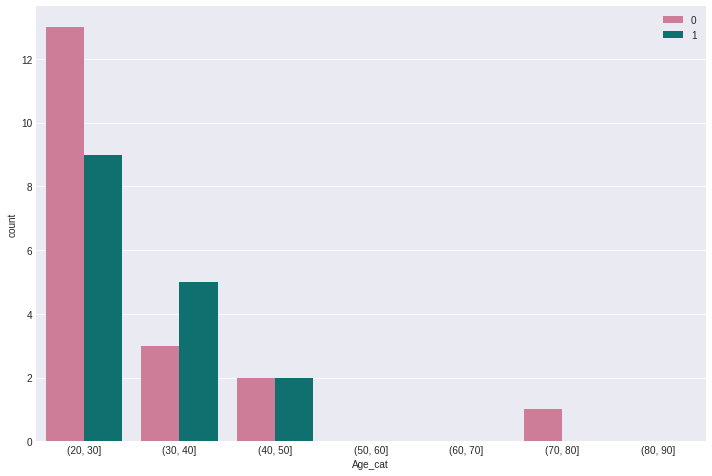

In [10]:
plt.figure(figsize=(12,8))
sns.countplot(data=zero_bp, x='Age_cat', hue='Outcome', palette=c1)
plt.legend(loc='upper right')

and we can see that age and thus arterial stiffness doesnt seem to be the reason for the diastolic bp being zero since most of the women in this zero_bp dataset belong to the group under 40 (as is the case for the entire data anyways)

We can also easily confirm this by looking at the zero bp dataframe

In [11]:
zero_bp.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Age_cat,Outcome
7,10,115,0,0,0,35.3,0.134,29,"(20, 30]",0
15,7,100,0,0,0,30.0,0.484,32,"(30, 40]",1
49,7,105,0,0,0,0.0,0.305,24,"(20, 30]",0
60,2,84,0,0,0,0.0,0.304,21,"(20, 30]",0
78,0,131,0,0,0,43.2,0.270,26,"(20, 30]",1


In [12]:
print(f"Out of a total of {len(zero_bp)} women with diastolic blood pressure = 0, {len(zero_bp[zero_bp['Age'] < 40])}\
 are under 40 years of age")

Out of a total of 35 women with diastolic blood pressure = 0, 29 are under 40 years of age


### The next thing we want to see is how many of these ladies suffer from diabetes in order to determine if being diabetic is the cause for the zero blood pressure: 

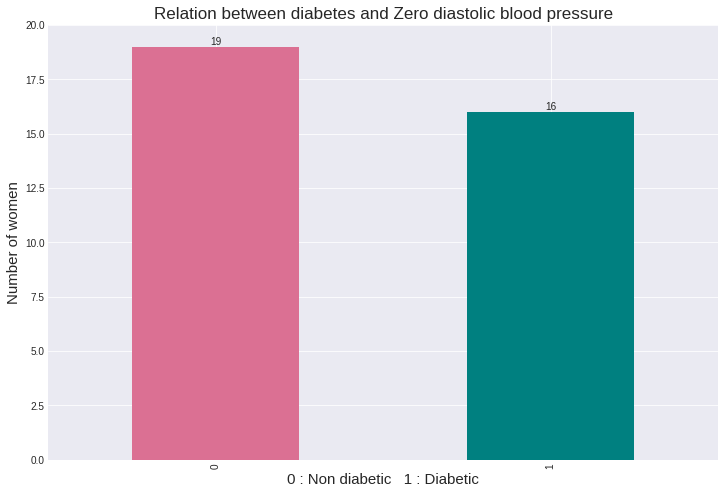

In [13]:
plt.figure(figsize=(12,8))
x = zero_bp['Outcome'].value_counts().index
y = zero_bp['Outcome'].value_counts().values

zero_bp.Outcome.value_counts().plot(kind='bar', color=c1)
plt.ylim([0,20])
plt.ylabel('Number of women', fontsize=15)
plt.xlabel('0 : Non diabetic   1 : Diabetic', fontsize=15)
plt.title('Relation between diabetes and Zero diastolic blood pressure', fontsize=17);

for i in range(2):
    plt.annotate(str(y[i]), xy=(x[i],y[i]), ha='center', va='bottom')

We can again see that the number is almost equal and so for the women suffering from diabetes, the zero diastolic bp could be because of it, but for the rest of the non diabetic women, it should be a reason that is beyond the  scope of this notebook.

So, we see that the zero blood pressure is neither because of old age (29 out of 35 women are young), nor because of diabetes since most of the women are actually non-diabetic so the only answer can be that **these are probably missing values, so we will replace the zeros with Nan and then impute them.**

### 3. Skin thickness

Triceps and subscapular skinfold thicknesses provide an index of body fat and midarm muscle circumference provides a measure of muscle mass. Although it was mentioned in one that a tricep skin fold thickness of <5mm is considered to be a case of severe malnutrition, I could not find any article or paper online talking about the possibility of a zero tricep skin fold therefore we will need to rely on logic because physically, a zero skinfold thickness doesn't seem to be possible, and hence these values will also be considered as missing values.


*Source: https://www.sciencedirect.com/topics/agricultural-and-biological-sciences/skinfold-thickness#:~:text=Nutritional%20Assessment,-Khursheed%20N.&text=Triceps%20and%20subscapular%20skinfold%20thicknesses,a%20measure%20of%20muscle%20mass.*

### 4. Insulin

2 hours post glucose administeration, in a healthy person, insulin levels should return to normal(16-166 mIU/L
)[*source:https://emedicine.medscape.com/article/2089224-overview?reg=1*], whereas for type 1 diabetes patients since the pancrease don't produce any insulin, it should be zero. Type 2 patients experience hyperinsulinemia due to which the insulin levels remain higher than normal[*Source:https://blog.thefastingmethod.com/understanding-joseph-kraft-diabetes-in-situ-t2d-24/]*.

Due to the presence of Type 1 patients, a zero value of serum insulin level should be expected for some patients, due to which it becomes difficult to decide whether or not to consider these zeros as missing values...Let's explore the relation of zero serum insulin with disease outcome to decide upon this.

> - If i convert mIU/L into mIU/ml then the value becomes toooo small
> - similarly for if i convert micro IU/ml to mIU/ml ; but according to https://labs.selfdecode.com/blog/thyroid-stimulating-hormone/#:~:text=TSH%20is%20usually%20measured%20in,vary%20from%20lab%20to%20lab ;  micro IU is equivalent to milli IU
> - what should i do with the units???

In [14]:
# we can see that almost 50% of the dataset has zero serum insulin value
len(df[df['Insulin'] == 0])/len(df)

0.4869791666666667

In [15]:
df[df['Insulin'] == 0]['Outcome'].value_counts()

0    236
1    138
Name: Outcome, dtype: int64

Surprisingly most of the zeros are in the non-diabetics which leads me to think there is no connection of these zeros with the disease outcome as previously assumed..but since the non-diabetic patients are much higher in number as compared to diabetics in the dataset, we will look at the proportion.

In [16]:
df['zero_insulin'] = np.where(df['Insulin']==0,1,0)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,zero_insulin
0,6,148,72,35,0,33.6,0.627,50,1,1
1,1,85,66,29,0,26.6,0.351,31,0,1
2,8,183,64,0,0,23.3,0.672,32,1,1
3,1,89,66,23,94,28.1,0.167,21,0,0
4,0,137,40,35,168,43.1,2.288,33,1,0
...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,0
764,2,122,70,27,0,36.8,0.340,27,0,1
765,5,121,72,23,112,26.2,0.245,30,0,0
766,1,126,60,0,0,30.1,0.349,47,1,1


In [17]:
df.groupby('Outcome').zero_insulin.mean()

Outcome
0    0.472000
1    0.514925
Name: zero_insulin, dtype: float64

So, it turns out that although there is larger proportion of zeros in diabetics, the proportion of zeros in non-diabetics is also 47% and thus, the presence of almost 50% zeros in both classes seems to be random therefore no relation can be established with disease outcome, thus it will be treated as missing value.

### 4. BMI

Body Mass Index (BMI) is a person’s weight in kilograms (or pounds) divided by the square of height in meters (or feet) and since neither of these can be zero, hence it doesnt make sense for the BMI of any individual to be zero. Hence it is only logical to consider these zero values as missing values.

*Source:https://www.cdc.gov/healthyweight/assessing/bmi/index.html#:~:text=Body%20Mass%20Index%20(BMI)%20is,in%20meters%20(or%20feet).*

### On the basis of above analysis, we will be replacing the zero values in Glucose, Blood Pressure, Skin thickness, Insulin and BMI with NaN

In [18]:
# right now there are no null values in the dataset
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
zero_insulin                0
dtype: int64

In [19]:
cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols] = df[cols].replace(0,np.nan)

In [20]:
# we can now see the nan values in the dataset
df.isnull().sum()     

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
zero_insulin                  0
dtype: int64

In [21]:
df.isnull().mean().round(3)*100

Pregnancies                  0.0
Glucose                      0.7
BloodPressure                4.6
SkinThickness               29.6
Insulin                     48.7
BMI                          1.4
DiabetesPedigreeFunction     0.0
Age                          0.0
Outcome                      0.0
zero_insulin                 0.0
dtype: float64

So, the missing data in the variable Glucose is 0.7%, in Blood Pressure 4.6%, 29.6% in skin thickness, 48.7% in Insulin and 1.4% in BMI.

In [22]:
# let's check for duplicate columns if any
df.duplicated().any()

False

In [23]:
# Let's check if the names of the columns have any spaces
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'zero_insulin'],
      dtype='object')

## Missing Data Imputation

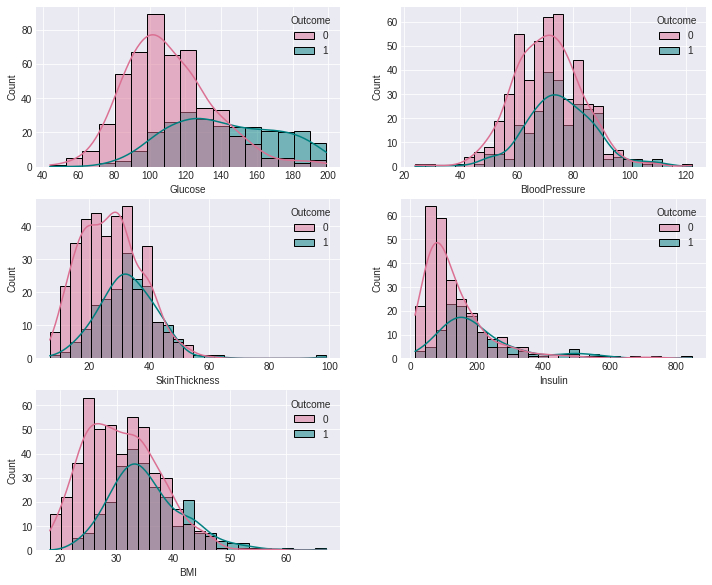

In [24]:
# lets first look at the distribution of the data
fig, ax = plt.subplots(3,2,figsize=(12,10))

sns.histplot(data = df, x = df['Glucose'], hue = df['Outcome'], kde = True, palette=c1, ax=ax[0,0])
sns.histplot(data = df, x = df['BloodPressure'], hue = df['Outcome'], kde = True, palette=c1, ax = ax[0,1])
sns.histplot(data = df, x = df['SkinThickness'], hue = df['Outcome'], kde = True, palette=c1, ax = ax[1,0])
sns.histplot(data = df, x = df['Insulin'], hue = df['Outcome'], kde = True, palette=c1, ax = ax[1,1])
sns.histplot(data = df, x = df['BMI'], hue = df['Outcome'], kde = True, palette=c1, ax=ax[2,0])
fig.delaxes(ax[2,1]) 

plt.show()

We can mostly see a normal distribution for blood pressure for both classes, hence can use mean for imputation, but for Glucose, skin thickness, Insulin and BMI, the distribution is skewed therefore it is better to use median as the representative of the population.

In addition we will analyse the percentage of Nan values according to class in each variable to determine if there is any relation with the disease outcome.

### Glucose

In [25]:
# since there is not a lot of missing values (only 0.7%) we will replace simply with the mean value of 
# blood glucose in the two classes

df.groupby(by='Outcome').Glucose.median()

Outcome
0    107.0
1    140.0
Name: Glucose, dtype: float64

In [26]:
# save indices with missing glucose values
null_glucose = df[df['Glucose'].isnull()].index
null_glucose

Int64Index([75, 182, 342, 349, 502], dtype='int64')

In [27]:
# tranforming the Glucose column with median glucose values according to class (diabetic (0) or non=diabetic (1))
median_glucose = df.groupby(by='Outcome').transform('median')['Glucose']

# replacing Nan values with group specific median glucose values
df['Glucose'].fillna(median_glucose, inplace=True)

In [28]:
# the missing values have been replaced according to grp specific median glucose values
df.iloc[null_glucose, :] 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,zero_insulin
75,1,107.0,48.0,20.0,NaN,24.7,0.140,22,0,1
182,1,107.0,74.0,20.0,23.0,27.7,0.299,21,0,0
342,1,107.0,68.0,35.0,NaN,32.0,0.389,22,0,1
349,5,140.0,80.0,32.0,NaN,41.0,0.346,37,1,1
502,6,140.0,68.0,41.0,NaN,39.0,0.727,41,1,1


In [29]:
df.Glucose.isnull().sum()   # no null values anymore

0

### Blood Pressure

In [30]:
# Let's see if there is any relation between the missing values and the outcome
df['BP_null'] = np.where(df['BloodPressure'].isnull(), 1, 0)

In [31]:
df.groupby('Outcome').BP_null.mean()   
# the difference doesn't seem to be very large, hence probably no relationship with disease outcome
# we will replace missing values with mean

Outcome
0    0.038000
1    0.059701
Name: BP_null, dtype: float64

In [32]:
# check the mean blood pressure value according to class
df.groupby('Outcome').BloodPressure.mean()

Outcome
0    70.877339
1    75.321429
Name: BloodPressure, dtype: float64

In [33]:
# save the null indices to compare later
null_bp = df.loc[df['BloodPressure'].isnull()].index
null_bp

Int64Index([  7,  15,  49,  60,  78,  81, 172, 193, 222, 261, 266, 269, 300,
            332, 336, 347, 357, 426, 430, 435, 453, 468, 484, 494, 522, 533,
            535, 589, 601, 604, 619, 643, 697, 703, 706],
           dtype='int64')

In [34]:
# tranforming the Blood Pressure column with mean BP values according to class (diabetic (0) or non=diabetic (1))
mean_bp = df.groupby('Outcome').BloodPressure.transform('mean')

# replacing Nan values with group specific mean blood pressure values
df['BloodPressure'].fillna(mean_bp, inplace=True)

In [35]:
 # the missing values have been replace according to grp specific mean blood pressure values
df.iloc[null_bp]   

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,zero_insulin,BP_null
7,10,115.0,70.877339,NaN,NaN,35.3,0.134,29,0,1,1
15,7,100.0,75.321429,NaN,NaN,30.0,0.484,32,1,1,1
49,7,105.0,70.877339,NaN,NaN,NaN,0.305,24,0,1,1
60,2,84.0,70.877339,NaN,NaN,NaN,0.304,21,0,1,1
78,0,131.0,75.321429,NaN,NaN,43.2,0.270,26,1,1,1
81,2,74.0,70.877339,NaN,NaN,NaN,0.102,22,0,1,1
172,2,87.0,70.877339,23.0,NaN,28.9,0.773,25,0,1,1
193,11,135.0,75.321429,NaN,NaN,52.3,0.578,40,1,1,1
222,7,119.0,70.877339,NaN,NaN,25.2,0.209,37,0,1,1
261,3,141.0,75.321429,NaN,NaN,30.0,0.761,27,1,1,1


In [36]:
df['BloodPressure'].isnull().sum()    # no null values left

0

In [37]:
df.drop(columns='BP_null', inplace=True)

### Skin Thickness

In [38]:
# Let's see if there is any relation between the missing values and the outcome
df['null_SkinThickness'] = np.where(df['SkinThickness'].isnull(), 1, 0)
df.groupby('Outcome').null_SkinThickness.mean()

Outcome
0    0.278000
1    0.328358
Name: null_SkinThickness, dtype: float64

Looks like the diabetic people have more data Nan values for skin thickness as compared to non-diabetic people but still the difference is not as large as to attribute it to the disease outcome.

In [39]:
# check the median skin thickness value according to class
df.groupby('Outcome')['SkinThickness'].median()

Outcome
0    27.0
1    32.0
Name: SkinThickness, dtype: float64

In [40]:
# save the null indices for comparison later on
null_st = df[df['SkinThickness'].isnull()].index
null_st

Int64Index([  2,   5,   7,   9,  10,  11,  12,  15,  17,  21,
            ...
            734, 739, 743, 749, 750, 757, 758, 759, 762, 766],
           dtype='int64', length=227)

In [41]:
# tranforming the Skin thickness column with median values according to class (diabetic (0) or non=diabetic (1))
median_st = df.groupby('Outcome')['SkinThickness'].transform('median')

# replacing Nan values with group specific median skin thickness values
df['SkinThickness'].fillna(median_st, inplace=True)

In [42]:
# the missing values have been replaced according to grp specific median skin thickness values
df.iloc[null_st, :]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,zero_insulin,null_SkinThickness
2,8,183.0,64.000000,32.0,NaN,23.3,0.672,32,1,1,1
5,5,116.0,74.000000,27.0,NaN,25.6,0.201,30,0,1,1
7,10,115.0,70.877339,27.0,NaN,35.3,0.134,29,0,1,1
9,8,125.0,96.000000,32.0,NaN,NaN,0.232,54,1,1,1
10,4,110.0,92.000000,27.0,NaN,37.6,0.191,30,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
757,0,123.0,72.000000,32.0,NaN,36.3,0.258,52,1,1,1
758,1,106.0,76.000000,27.0,NaN,37.5,0.197,26,0,1,1
759,6,190.0,92.000000,32.0,NaN,35.5,0.278,66,1,1,1
762,9,89.0,62.000000,27.0,NaN,22.5,0.142,33,0,1,1


In [43]:
# no null values present
df['SkinThickness'].isnull().any()

False

In [44]:
df.drop(columns='null_SkinThickness', inplace=True)

### BMI

In [45]:
# Let's see if there is any relation between the missing values and the outcome
df['null_BMI'] = np.where(df['BMI'].isnull(), 1, 0)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,zero_insulin,null_BMI
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1,1,0
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0,1,0
2,8,183.0,64.0,32.0,NaN,23.3,0.672,32,1,1,0
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,0,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0,0,0
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0,1,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0,0,0
766,1,126.0,60.0,32.0,NaN,30.1,0.349,47,1,1,0


In [46]:
df.groupby('Outcome')['null_BMI'].mean()

Outcome
0    0.018000
1    0.007463
Name: null_BMI, dtype: float64

Most of the missing values BMI values are with the non-diabetic patients hence there doesn't seem to be an association with the disease outcome.

In [47]:
# check the median BMI value according to class
df.groupby('Outcome')['BMI'].median()

Outcome
0    30.1
1    34.3
Name: BMI, dtype: float64

In [48]:
# save the null indices for comparison later on
null_BMI = df[df['BMI'].isnull()].index
null_BMI

Int64Index([9, 49, 60, 81, 145, 371, 426, 494, 522, 684, 706], dtype='int64')

In [49]:
# tranforming the BMI column with median values according to class (diabetic (0) or non=diabetic (1))
median_BMI = df.groupby('Outcome')['BMI'].transform('median')

# replacing Nan values with group specific median BMI values
df['BMI'].fillna(median_BMI, inplace=True)

In [50]:
# all the null values in the BMI column have been replaced with the median BMI value as per class
df.iloc[null_BMI, :]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,zero_insulin,null_BMI
9,8,125.0,96.000000,32.0,NaN,34.3,0.232,54,1,1,1
49,7,105.0,70.877339,27.0,NaN,30.1,0.305,24,0,1,1
60,2,84.0,70.877339,27.0,NaN,30.1,0.304,21,0,1,1
81,2,74.0,70.877339,27.0,NaN,30.1,0.102,22,0,1,1
145,0,102.0,75.000000,23.0,NaN,30.1,0.572,21,0,1,1
371,0,118.0,64.000000,23.0,89.0,30.1,1.731,21,0,0,1
426,0,94.0,70.877339,27.0,NaN,30.1,0.256,25,0,1,1
494,3,80.0,70.877339,27.0,NaN,30.1,0.174,22,0,1,1
522,6,114.0,70.877339,27.0,NaN,30.1,0.189,26,0,1,1
684,5,136.0,82.000000,27.0,NaN,30.1,0.640,69,0,1,1


In [51]:
df['BMI'].isnull().any() # no null values remaining

False

In [52]:
df.drop(columns=['null_BMI'], inplace=True)

### Insulin

In [53]:
# check the median Insulin value according to class
df.groupby('Outcome').Insulin.median()

Outcome
0    102.5
1    169.5
Name: Insulin, dtype: float64

In [54]:
# save the null indices for comparison later on
null_insulin = df[df['Insulin'].isnull()].index
null_insulin

Int64Index([  0,   1,   2,   5,   7,   9,  10,  11,  12,  15,
            ...
            754, 756, 757, 758, 759, 761, 762, 764, 766, 767],
           dtype='int64', length=374)

In [55]:
# tranforming the Insulin column with median values according to class (diabetic (0) or non=diabetic (1))
median_insulin = df.groupby('Outcome').Insulin.transform('median')

# replacing Nan values with group specific median insulin values
df['Insulin'].fillna(median_insulin, inplace=True)

In [56]:
# all the null values in the insulin column have been replaced with the median insulin value as per class
df.iloc[null_insulin]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,zero_insulin
0,6,148.0,72.000000,35.0,169.5,33.6,0.627,50,1,1
1,1,85.0,66.000000,29.0,102.5,26.6,0.351,31,0,1
2,8,183.0,64.000000,32.0,169.5,23.3,0.672,32,1,1
5,5,116.0,74.000000,27.0,102.5,25.6,0.201,30,0,1
7,10,115.0,70.877339,27.0,102.5,35.3,0.134,29,0,1
...,...,...,...,...,...,...,...,...,...,...
761,9,170.0,74.000000,31.0,169.5,44.0,0.403,43,1,1
762,9,89.0,62.000000,27.0,102.5,22.5,0.142,33,0,1
764,2,122.0,70.000000,27.0,102.5,36.8,0.340,27,0,1
766,1,126.0,60.000000,32.0,169.5,30.1,0.349,47,1,1


In [57]:
df['Insulin'].isnull().any()   # no null values remaining

False

In [58]:
# no null values in the entire dataset as all have been replaced.
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
zero_insulin                0
dtype: int64

In [59]:
df.drop(columns='zero_insulin', inplace=True)

In [60]:
# let's change the column name to DBF since DiabetesPedigreeFunction is too long
df.rename(columns = {'DiabetesPedigreeFunction':'DPF'}, inplace=True)

## II. Check the data for outliers!!

For removal of outliers we need to consider the variables that have normal distribution separately from variables that have a skewed distribution.

1. If the the variable is Normally distributed (Gaussian), then the values that lie outside the mean plus or minus 3 times the standard deviation of the variable are considered outliers.

> outliers = mean +/- 3* std


2. If the variable is skewed distributed, a general approach is to calculate the quantiles, and then the inter-quantile range (IQR), as follows:

> IQR = 75th quantile - 25th quantile

> An outlier will sit outside the following upper and lower boundaries:
> - Upper boundary = 75th quantile + (IQR * 1.5)
> - Lower boundary = 25th quantile - (IQR * 1.5)


In [66]:
# diagnostic plot function

import scipy.stats as stats

def diagnostic_plot(df, variable):
    
    sns.set(font_scale=1.0)
    plt.figure(figsize=(16,4))
    
    # histplot
    plt.subplot(1,3,1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')
    
    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('RM quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

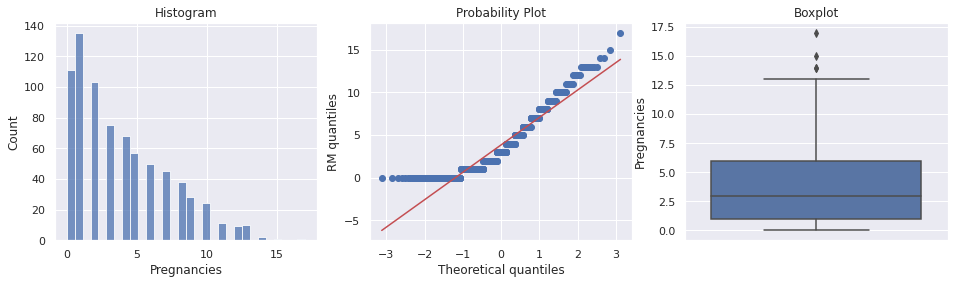

In [67]:
# Pregnancies

diagnostic_plot(df, 'Pregnancies')

From the histogram and probability plot , we can see that pregnancies does not follow the normal distribution but instead has a left skewed distribution, and could have outliers with a few points sitting beyond the right whisker of the boxplot.

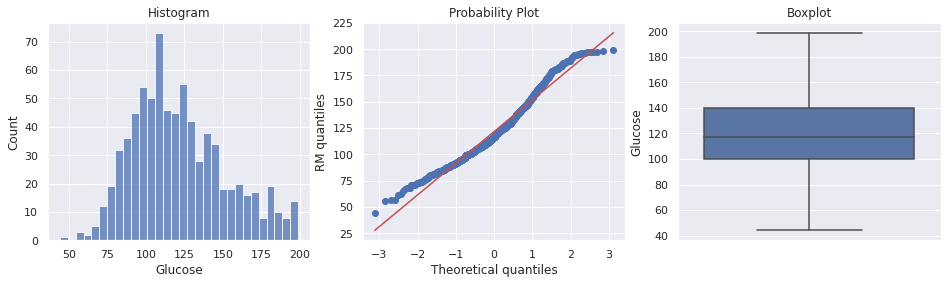

In [68]:
# Glucose
diagnostic_plot(df, 'Glucose')

Glucose variable almost follows the normal/Gaussian distribution with points at the right end straying away from it, and we can see from the boxplot that it doesn't have any outliers!

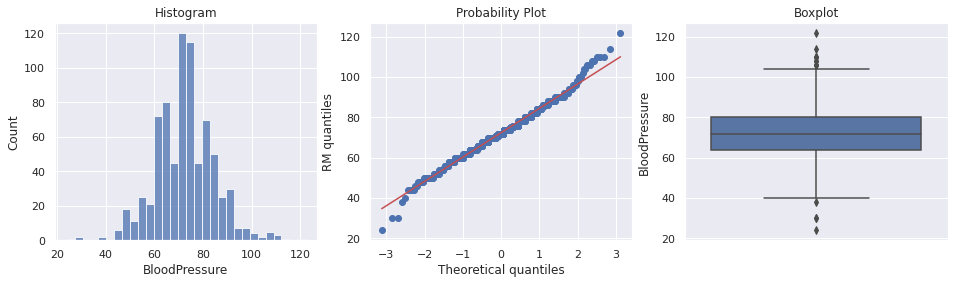

In [69]:
# Blood Pressure
diagnostic_plot(df, 'BloodPressure')

Blood Pressure follows the normal distribution quite well, and from the boxplot we can see that it could have some outliers towards both the right and left side of the distribution!

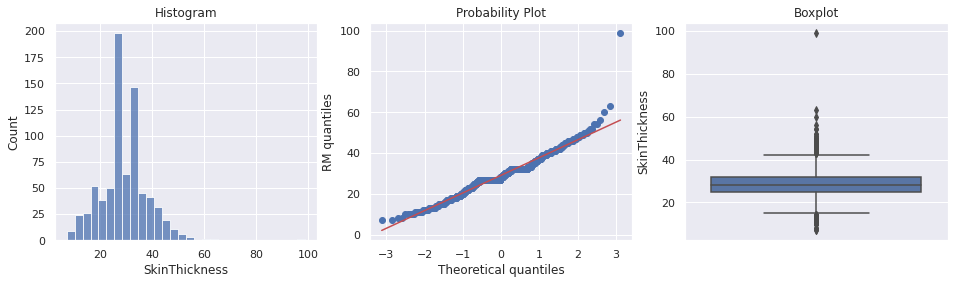

In [70]:
# Skin thickness
diagnostic_plot(df, 'SkinThickness')

The skin thickness variable approximates fairly well as a normally distributed variable, and from the box plot we can see that it has quite a few outliers both towards the left and the right end of the distribution.

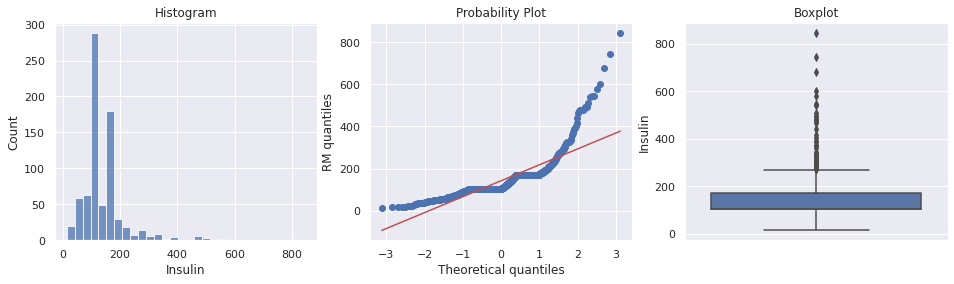

In [71]:
# Insulin
diagnostic_plot(df, 'Insulin')

Insulin shows a left skewed distribution with quite a lot of outliers only towards the right side of the distribution.

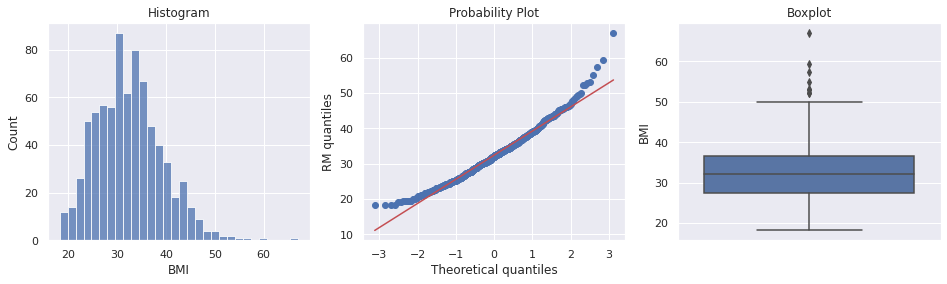

In [72]:
# BMI
diagnostic_plot(df, 'BMI')

Even BMI shows a left skewed distribution, and the box plot shows that it could have a few outliers towards the right side.

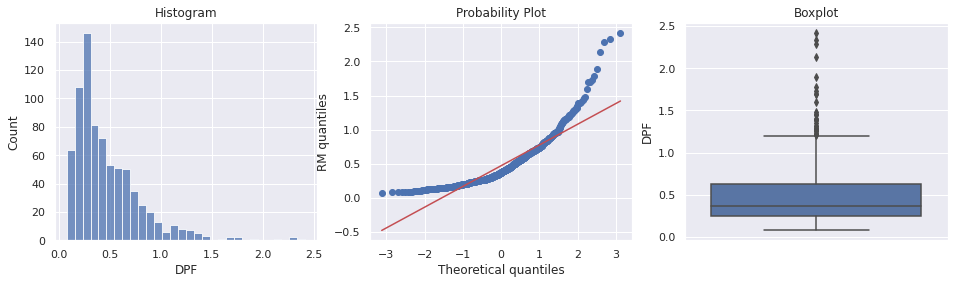

In [73]:
# DPF
diagnostic_plot(df, 'DPF')

Diabetes Pedigree Function also shows a left skewed distribution, with quite a few outliers towards the right side of the distribution.

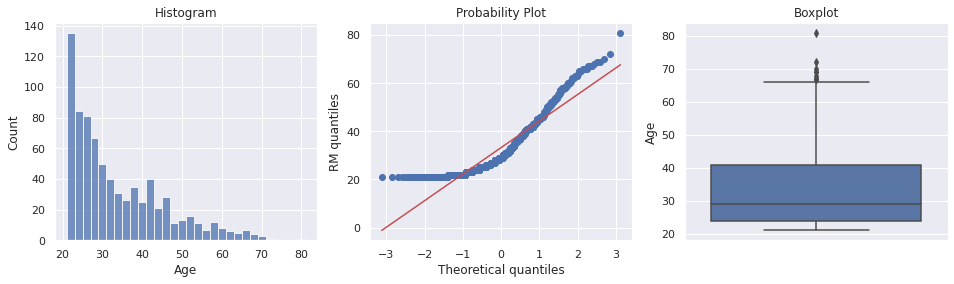

In [74]:
# Age
diagnostic_plot(df, 'Age')

Age also shows a left skewed distribution with a few outliers towards the right side of the distribution.

**Now that we have had a look at the variables that might contain outliers, let's define the upper and lower boundaries for the variables with outliers**

In [75]:
# function to define the boundary for variables with normal distribution

def normal_boundaries(df, variable):
    
    mean = df[variable].mean()
    std = df[variable].std()
    upper_boundary = mean + (3*std)
    lower_boundary = mean - (3*std)
    
    return upper_boundary, lower_boundary

# function to define the boundaries for variables with skewed distribution

def skewed_boundaries(df, variable):
    
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)
    
    upper_boundary = df[variable].quantile(0.75) + (IQR * 1.5)
    lower_boundary = df[variable].quantile(0.25) - (IQR * 1.5)
    
    return upper_boundary, lower_boundary

In [76]:
# 1. Pregnancies

ub_preg, lb_preg = skewed_boundaries(df, 'Pregnancies')
ub_preg, lb_preg

(13.5, -6.5)

Since the lower boundary for pregnancies is in negatives, we are only going to consider the upper boundary, according to which more than 13.5 pregnancies is very rare therefore they are considered outliers.



In [98]:
# let's see how many outliers are present
print(f'Total number of patients in the dataset: {len(df)}')
print(f'Total number of patients who have had more than 13.5 pregnancies: {len(df[df.Pregnancies > ub_preg])}')
print(f"% of patients that've had more than 13.5 pregnancies: {len(df[df['Pregnancies'] > ub_preg])/len(df):.3f}")

Total number of patients in the dataset: 768
Total number of patients who have had more than 13.5 pregnancies: 4
% of patients that've had more than 13.5 pregnancies: 0.005


In [100]:
# 2.Blood Pressure

ub_bp, lb_bp = normal_boundaries(df, 'BloodPressure')
ub_bp, lb_bp

(108.74627237165973, 36.1100096486848)

So, Diastolic Blood Pressure of more than 108.75 and less than 36.11 occure very rarely, and thus can be considered as outliers!

In [105]:
print(f'Total number of patients in the dataset: {len(df)}')
print('\n')
print(f'Total number of patients who have a diastolic bp > 108.75 mm hg (right end outliers): {len(df[df.BloodPressure > ub_bp])}')
print(f'Total number of patients who have a diastolic bp < 36.11 mm hg (left end outliers): {len(df[df.BloodPressure < lb_bp])}')
print('\n')
print(f"% of right end outliers: {len(df[df['BloodPressure'] > ub_bp])/len(df):.3f}")
print(f"% of left end outliers: {len(df[df['BloodPressure'] < lb_bp])/len(df):.3f}")

Total number of patients in the dataset: 768


Total number of patients who have a diastolic bp > 108.75 mm hg (right end outliers): 5
Total number of patients who have a diastolic bp < 36.11 mm hg (left end outliers): 3


% of right end outliers: 0.007
% of left end outliers: 0.004


In [108]:
# 3.Skin Thickness
ub_st, lb_st = skewed_boundaries(df, 'SkinThickness')
ub_st, lb_st

(42.5, 14.5)

so a tricep fold skin thickness of more than 42.5 mm and less than 14.5 mm is very rare and hence these can be considered as outliers!

In [109]:
print(f'Total number of patients in the dataset: {len(df)}')
print('\n')
print(f'Total number of patients who have skin thickness > 42.5 (right end outliers): {len(df[df.SkinThickness > ub_st])}')
print(f'Total number of patients who have skin thickness < 14.5 (left end outliers): {len(df[df.SkinThickness < lb_st])}')
print('\n')
print(f"% of right end outliers: {len(df[df['SkinThickness'] > ub_st])/len(df):.3f}")
print(f"% of left end outliers: {len(df[df['SkinThickness'] < lb_st])/len(df):.3f}")

Total number of patients in the dataset: 768


Total number of patients who have skin thickness > 42.5 (right end outliers): 48
Total number of patients who have skin thickness < 14.5 (left end outliers): 39


% of right end outliers: 0.062
% of left end outliers: 0.051


In [110]:
# 4.Insulin
ub_insulin, lb_insulin = skewed_boundaries(df, 'Insulin')
ub_insulin, lb_insulin

(270.0, 2.0)

A 2-hour post glucose administeration serum insulin level of more than 270 and less than 2 is quite rare and hence considered as outliers.

In [111]:
print(f'Total number of patients in the dataset: {len(df)}')
print('\n')
print(f'Total number of patients who have a serum insulin level > 270 (right end outliers): {len(df[df.Insulin > ub_insulin])}')
print(f'Total number of patients who have a serum insulin level < 2 (left end outliers): {len(df[df.Insulin < lb_insulin])}')
print('\n')
print(f"% of right end outliers: {len(df[df['Insulin'] > ub_insulin])/len(df):.3f}")
print(f"% of left end outliers: {len(df[df['Insulin'] < lb_insulin])/len(df):.3f}")

Total number of patients in the dataset: 768


Total number of patients who have a serum insulin level > 270 (right end outliers): 51
Total number of patients who have a serum insulin level < 2 (left end outliers): 0


% of right end outliers: 0.066
% of left end outliers: 0.000


In [112]:
# 5.BMI 
ub_bmi, lb_bmi = skewed_boundaries(df, 'BMI')
ub_bmi, lb_bmi

(50.25, 13.849999999999998)

So, bmi values of more than 50.25 and less than 13.84 are quite rare and hence considered outliers!

In [113]:
print(f'Total number of patients in the dataset: {len(df)}')
print('\n')
print(f'Total number of patients who have a bmi > 50.25 (right end outliers): {len(df[df.BMI > ub_bmi])}')
print(f'Total number of patients who have a bmi < 13.84 (left end outliers): {len(df[df.BMI < lb_bmi])}')
print('\n')
print(f"% of right end outliers: {len(df[df['BMI'] > ub_bmi])/len(df):.3f}")
print(f"% of left end outliers: {len(df[df['BMI'] < lb_bmi])/len(df):.3f}")

Total number of patients in the dataset: 768


Total number of patients who have a bmi > 50.25 (right end outliers): 8
Total number of patients who have a bmi < 13.84 (left end outliers): 0


% of right end outliers: 0.010
% of left end outliers: 0.000


In [114]:
# 6.DPF
ub_dpf, lb_dpf = skewed_boundaries(df, 'DPF')
ub_dpf, lb_dpf

(1.2, -0.32999999999999996)

Since the lower(left) boundary is negative and DPF cannot be negative hence we will consider only the upper boundary according to which any patients with DPF > 1.2 can be considered outliers!

In [116]:
print(f'Total number of patients in the dataset: {len(df)}')
print('\n')
print(f'Total number of patients who have a DPF > 1.2 (right end outliers): {len(df[df.DPF > ub_dpf])}')
print('\n')
print(f"% of right end outliers: {len(df[df['DPF'] > ub_dpf])/len(df):.3f}")

Total number of patients in the dataset: 768


Total number of patients who have a DPF > 1.2 (right end outliers): 29


% of right end outliers: 0.038


In [117]:
# 7.Age
ub_age, lb_age = skewed_boundaries(df, 'Age')
ub_age, lb_age

(66.5, -1.5)

Again, since age cannot be negative hence we will only be considering the upper or right end boundary for age according to which patients above 66.5 years of age are very rare and hence outliers!

In [118]:
print(f'Total number of patients in the dataset: {len(df)}')
print('\n')
print(f'Total number of patients who have age > 66.5 years (right end outliers): {len(df[df.Age > ub_age])}')
print('\n')
print(f"% of right end outliers: {len(df[df['Age'] > ub_age])/len(df):.3f}")

Total number of patients in the dataset: 768


Total number of patients who have age > 66.5 years (right end outliers): 9


% of right end outliers: 0.012


**We have now completed a thorough analysis of the outliers present in our dataset and except for Glucose, all the other variables had outliers..we can decide on removing them or keeping them, I have decided on keeping them, since it's bad practice to remove data points simply to produce a better fitting model or statistically significant results.In our case, the patients that are acting as outliers are natural observations in the population and hence removing them could lead to loss of important information. A good practice will be to rely on the results of tree based models that are robust to presence of outliers!** [*Source:https://statisticsbyjim.com/basics/remove-outliers/*]

Let's continue with a bit more of the analysis before proceeding for Machine Learning!

## III. Now that the imputation is done, *we will try and explore the relationship of the variables with the outcome, i.e., how the various feature columns are affecting whether a person is diabetic or not and based on this we will see if we can pick out the feature that is the most important wrt determining the outcome.*
**How to use EDA:**
- plotting the relationship between variables and target can give lot of insight into their relationship and help in determining whether some features can be simplified, combined and much more

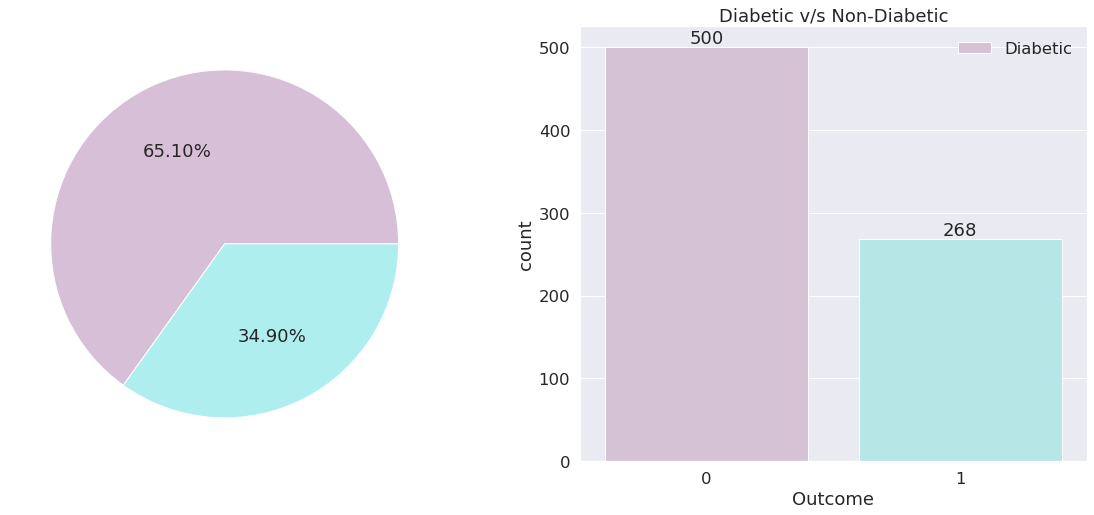

In [61]:
# let us first look at the count of the diabetics v/s non-diabetics
sns.set(font_scale=1.5)

dia_counts = df.Outcome.value_counts()
x = dia_counts.index
y = dia_counts.values

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(20,8))

ax1.pie(df['Outcome'].value_counts(),colors=['thistle','paleturquoise'],autopct='%1.2f%%')

sns.countplot(x = df.Outcome, palette=c3, ax=ax2)
ax2.set(title = 'Diabetic v/s Non-Diabetic')
ax2.legend(['Diabetic','Non-diabetic'])

for i in range(len(y)):
    plt.annotate(str(y[i]), xy=(x[i],y[i]), ha='center', va='bottom')
    

And here we can see the distribution of classes, the non-diabetics are almost twice as much as diabetics in number, so there is a bit of class imbalance.

<AxesSubplot:>

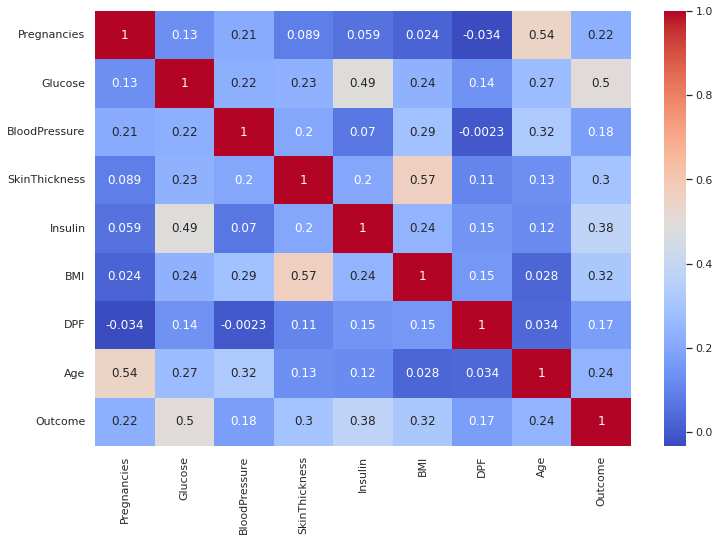

In [62]:
# look at the correlation amongst all the features
sns.set(font_scale=1)
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")

We can observe a few things:
- Age and pregnancies have a high positive correlation
- Tricep Skin fold thickness has a positive correlation with both the Insulin level and BMI
- Outcome is most highly positively correlated with Glucose levels 

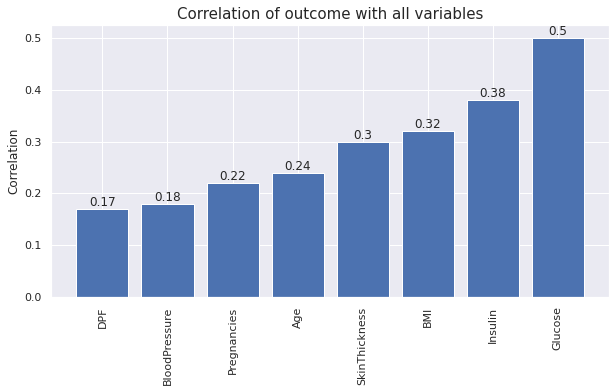

In [63]:
# correlation of outcome with other variables
outcome_corr = df.corr()['Outcome'].sort_values()
x = outcome_corr.index
y = outcome_corr.values.round(2)

plt.figure(figsize=(10,5))
plt.bar(x[:-1], y[:-1])
plt.xticks(rotation=90)
plt.title('Correlation of outcome with all variables', fontsize=15)
plt.ylabel('Correlation')

for i in range(len(outcome_corr.values)):
    plt.annotate(str(y[i]), xy = (x[i],y[i]), ha='center', va='bottom')

From this we can see that the outcome is maximally positively correlated with Glucose levels which is logical, since a diabetic person will have a higher glucose level in their blood.

Let's make pair plots to analyse relationship amongst the variables!!

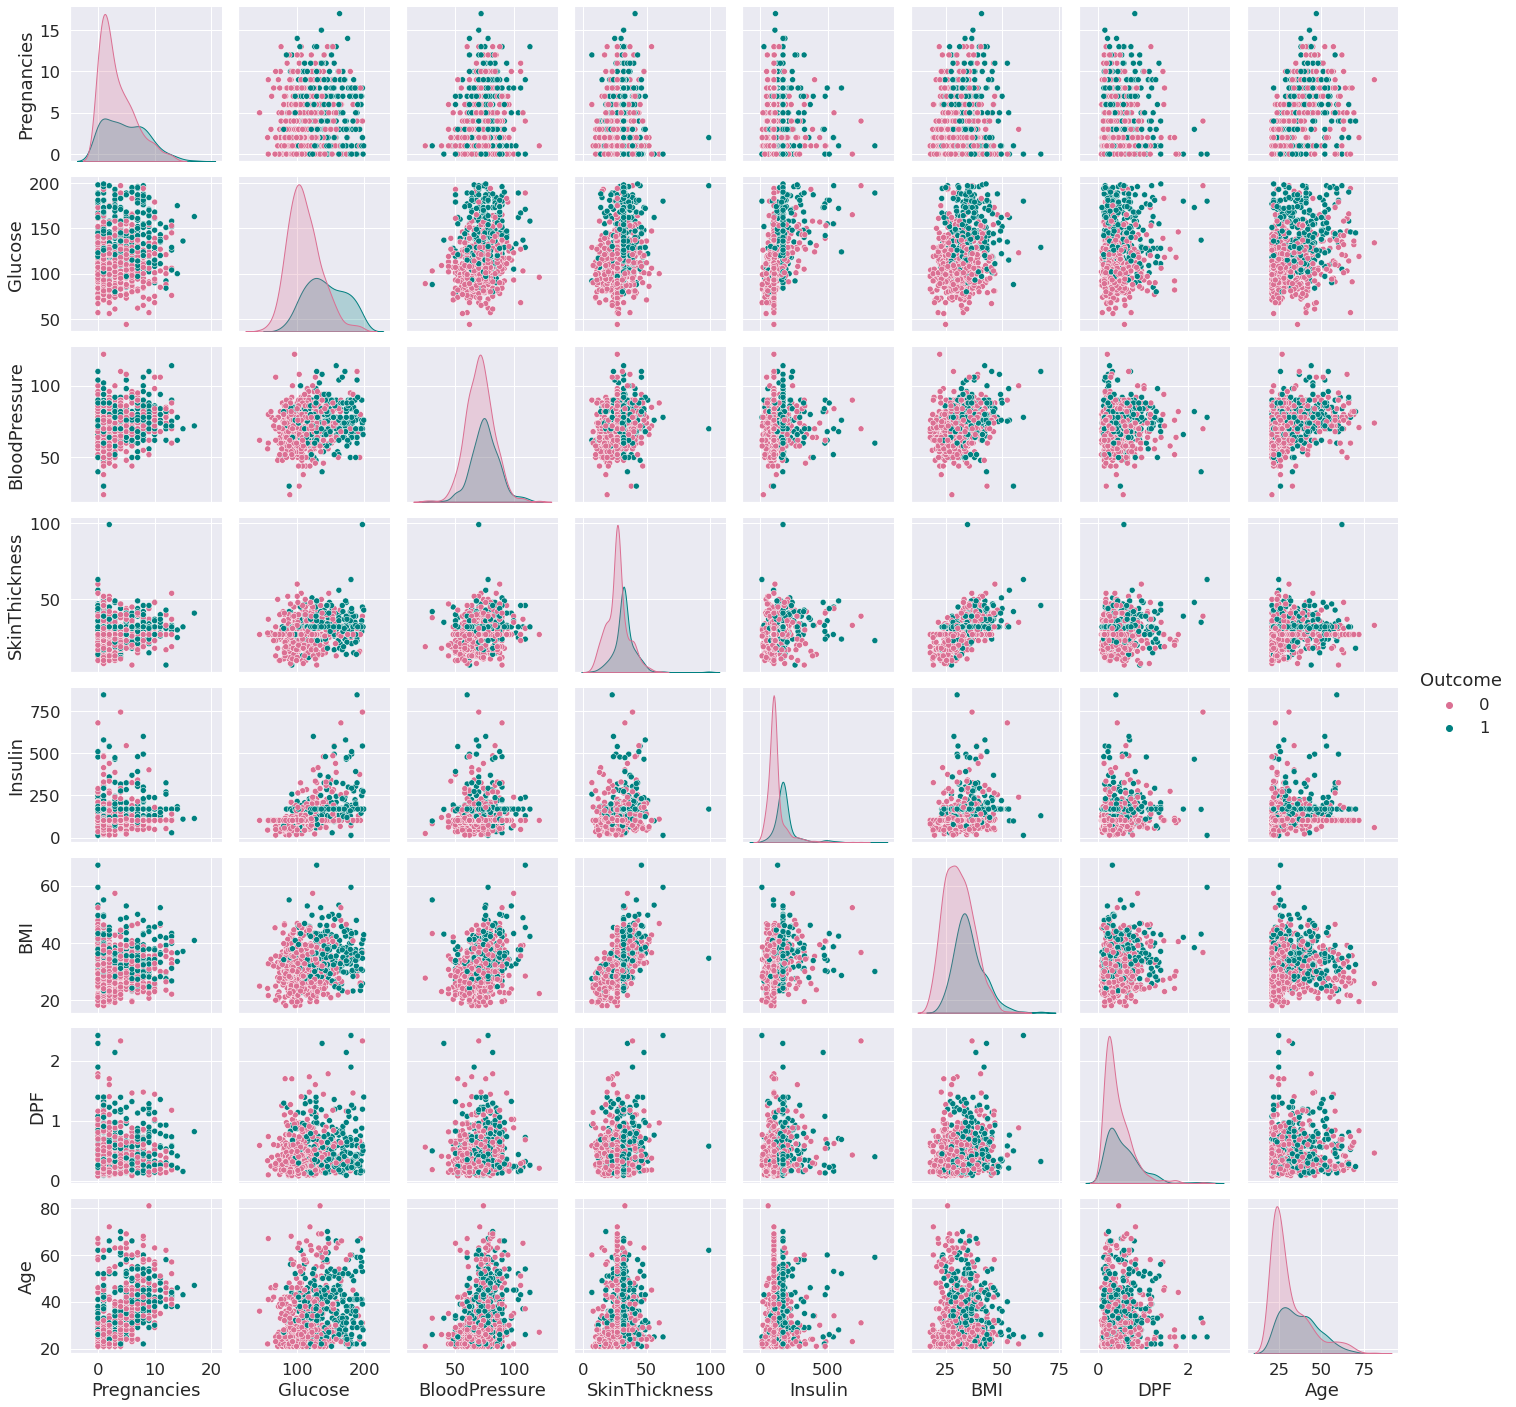

In [64]:
sns.set(font_scale = 1.5)
sns.pairplot(df, hue='Outcome', palette=c1)
plt.show()

**From both the correlation matrix and this pair plot, we can see that are no variable pairs with a strong correlation or a linear relationship.**

### let us compare the distributions of the diabetics vs the non-diabetics  wrt the different variables/features.

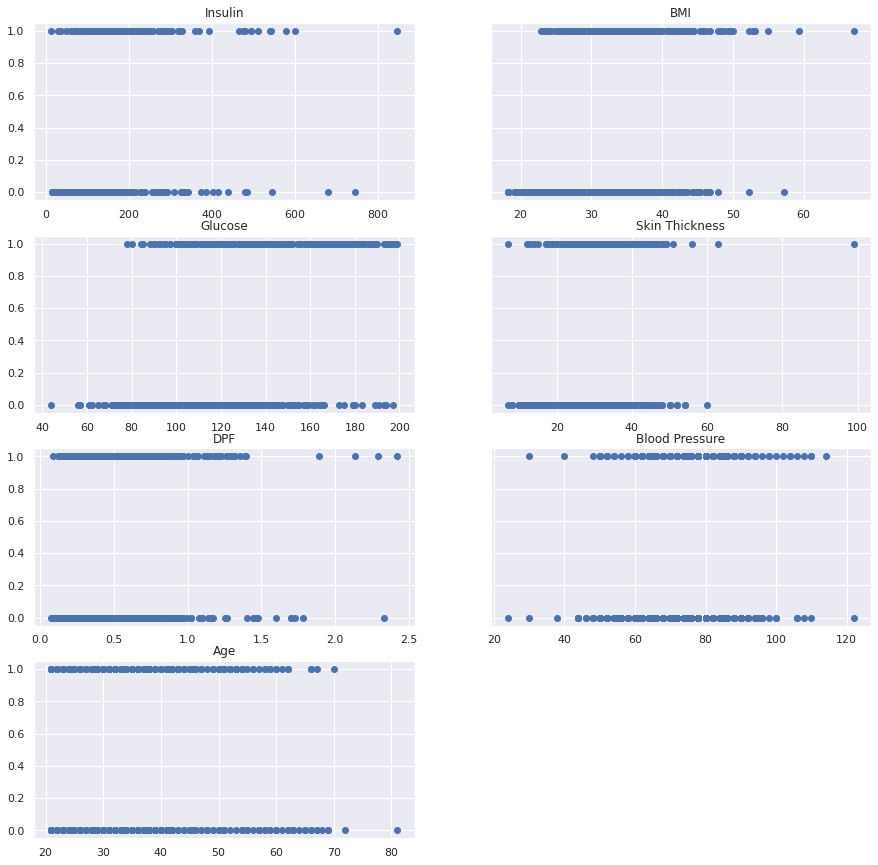

In [137]:
# scatterplot to analyse relationship of each variable with the disease outcome
fig, ax = plt.subplots(4,2,figsize=(15,15), sharey=True)
ax[0,0].scatter(df['Insulin'], df['Outcome'])
ax[0,0].set_title('Insulin')

ax[0,1].scatter(df['BMI'], df['Outcome'])
ax[0,1].set_title('BMI')

ax[1,0].scatter(df['Glucose'], df['Outcome'])
ax[1,0].set_title('Glucose')

ax[1,1].scatter(df['SkinThickness'], df['Outcome'])
ax[1,1].set_title('Skin Thickness')

ax[2,0].scatter(df['DPF'], df['Outcome'])
ax[2,0].set_title('DPF')

ax[2,1].scatter(df['BloodPressure'], df['Outcome'])
ax[2,1].set_title('Blood Pressure')

ax[3,0].scatter(df['Age'], df['Outcome'])
ax[3,0].set_title('Age')

fig.delaxes(ax[3,1])

**We can further confirm from this plot that there is no certain linear relationship between the different variables and the outcome values, logistic regression is bound to perform poorly on such dataset since none of the plots above seem to be able to fit the characteristic S-shaped curve that logreg tries to fit onto a variables distributions to make predictions.**

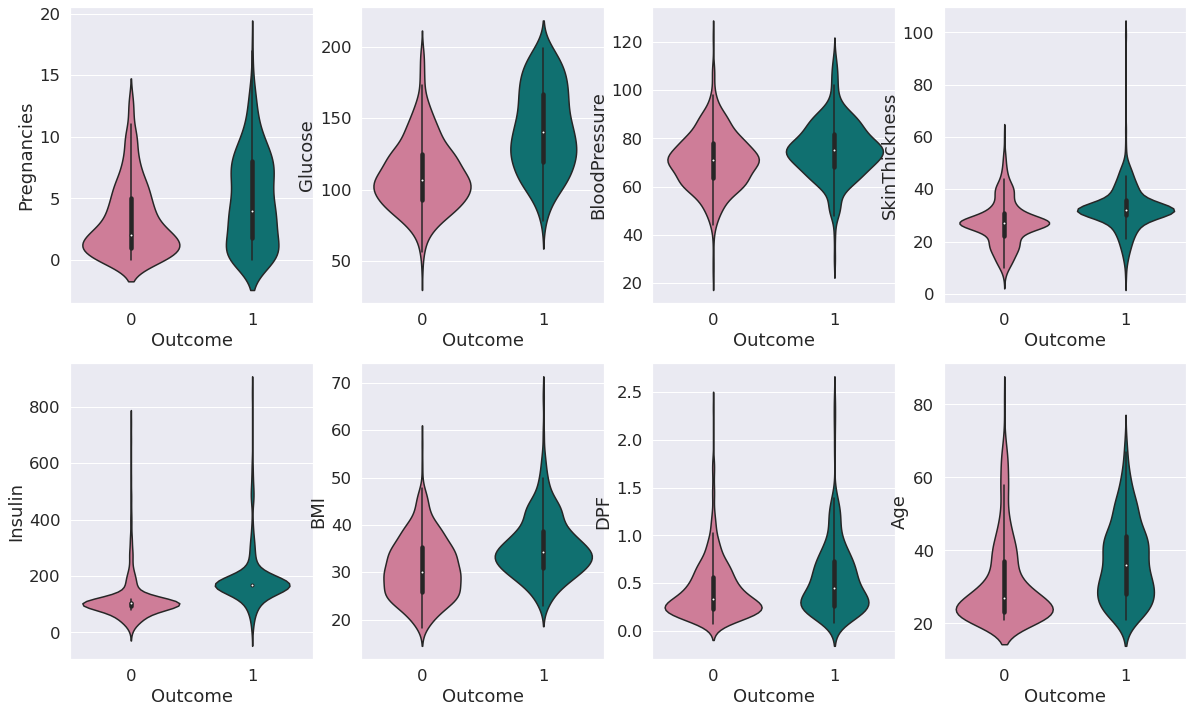

In [65]:
# violin plots !!

fig,ax = plt.subplots(2,4,figsize=(20,12))

sns.violinplot(data = df, x = 'Outcome', y = 'Pregnancies',palette = c1, ax = ax[0,0])
sns.violinplot(data = df, x = 'Outcome', y = 'Glucose', palette = c1, ax = ax[0,1])
sns.violinplot(data = df, x = 'Outcome', y = 'BloodPressure', palette = c1, ax = ax[0,2])
sns.violinplot(data = df, x = 'Outcome', y = 'SkinThickness', palette = c1, ax = ax[0,3])
sns.violinplot(data = df, x = 'Outcome', y = 'Insulin', palette = c1, ax = ax[1,0])
sns.violinplot(data = df, x = 'Outcome', y = 'BMI', palette = c1, ax = ax[1,1])
sns.violinplot(data = df, x = 'Outcome', y = 'DPF', palette = c1, ax = ax[1,2])
sns.violinplot(data = df, x = 'Outcome', y = 'Age', palette = c1, ax = ax[1,3])
plt.show()

**Observations:**
1. **Pregnancies:** We can see that most of the non-diabetic women had lower pregnancies whereas the diabetics show quite a widespread distribution from low to high number of pregnancies.
2. **Glucose:** Most of the non-diabetic women have glucose level after 2-hours around 100mg/dl which is the normal level, and as expected most of the diabetic patients have a higher glucose levels well above 100 mg/dl after 2 hours.
3. **BloodPressure:** There is not much difference in the diastolic blood pressure levels for both diabetic and non-diabetic patients with it being only slightly higher for the diabetic patients when compared with the non-diabetic patients but it still lies in the normal range.
4. **SkinThickness:** Not much difference in the distribution although the median value for tricep skin fold thickness in diabetic patients is higher than non-diabetic people.
5. **Insulin:** The median is lower for the non-diabetics as compared to the diabetics, so this tells us that the diabetics have quite a higher serum insulin level as compared to non-diabetics 2-hours post glucose admin. This can be possible in the case of most of the patients suffering from type 2 diabetes.
6. **BMI:** Most of the diabetic patients have a higher BMI as compared to non-diabetic patients.
7. **DiabetesPedigreeFunction:** the DPF for the diabetic patients is logically higher than the non-diabetic patients.
8. **Age:** Most of the non-diabetic population is younger, whereas diabetic patients in the dataset range from young to old as can be seen from the wide-spread distribution with the median age for diabetic people being much higher than for the non-diabetic people.

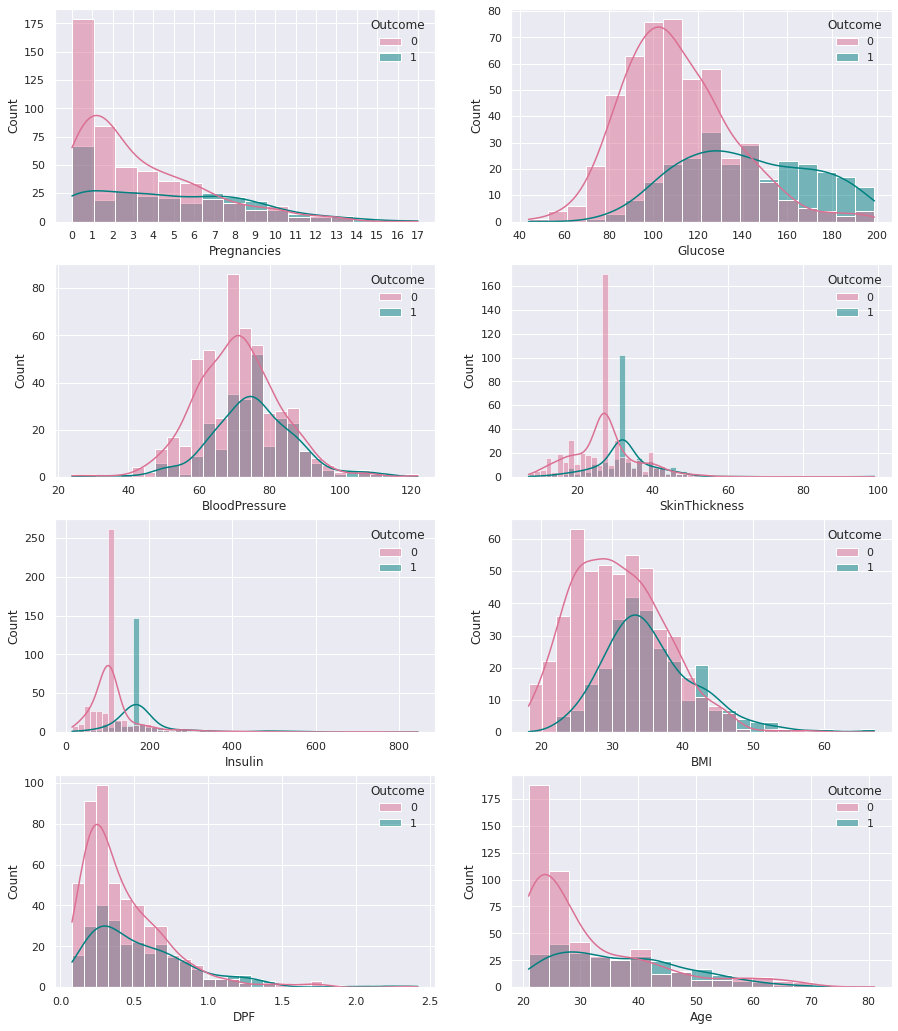

In [119]:
# histplots to look at variable distributions!!

fig, ax = plt.subplots(4,2,figsize=(15,18))

sns.histplot(data = df, x = 'Pregnancies',hue='Outcome', kde=True, palette = c1, ax = ax[0,0])
ax[0,0].set_xticks(ticks=range(0,18,1), labels=range(0,18,1))
sns.histplot(data = df, x = 'Glucose', hue='Outcome', kde=True, palette = c1, ax = ax[0,1])
sns.histplot(data = df, x = 'BloodPressure', hue='Outcome', kde=True, palette = c1, ax = ax[1,0])
sns.histplot(data = df, x = 'SkinThickness', hue='Outcome', kde=True, palette = c1, ax = ax[1,1])
sns.histplot(data = df, x = 'Insulin', hue='Outcome', kde=True, palette = c1, ax = ax[2,0])
sns.histplot(data = df, x = 'BMI', hue='Outcome', kde=True, palette = c1, ax = ax[2,1])
sns.histplot(data = df, x = 'DPF', hue='Outcome', kde=True, palette = c1, ax = ax[3,0])
sns.histplot(data = df, x = 'Age', hue='Outcome', kde=True, palette = c1, ax = ax[3,1])
plt.show()

**Observations:**
1. **Pregnancies:** 
> * Most of the **Non-Diabetic** women have had no pregnancies and then the ones that have had had mostly less than 3.
> * **Diabetic** women have had pregnancies mostly anywhere from 0-10.

2. **Glucose:** 
> * Most of the **Non-Diabetic** women have serum glucose concentration at the 2 hour mark of around 100 mg/dl
> * **Diabetic** women on the other hand mostly have serum glucose concentration more than 100 mg/dl.

3. **BloodPressure:** For both the distributions the peak is around the diastolic blood pressure range of 60-80 mm of Hg, but we do see a number of patients with around 0 bp in both the diabetic and non-diabetic group of patients which can act as outliers, need to see if this is biologically relevant.
4. **SkinThickness:** Most of the non diabetics have slightly smaller tricep fold thickness than the diabetics which means that they in general have less body fat.
5. **Insulin:** The diabetics show a higher median serum insulin level.
6. **BMI:** Most of the diabetic patients have a slightly higher BMI as compared to non-diabetic patients.
7. **DiabetesPedigreeFunction:** For both the diabetics and non-diabetics, there seems to be not much difference in the distribution according to this hist plot, however we know of the median DPF being higher for the diabetics as compared to the non-diabetics from the violin plot.
8. **Age:** Most of the non-diabetic population is younger, whereas diabetic patients in the dataset range from young to old as can be seen from the wide-spread distribution.

Looking at the above observations, Blood Glucose level, Age, BMI and Insulin levels are the only factors that are showing some noticeable difference in distribution between the two groups.

In [120]:
# PCA distribution!!

temp = df
X = temp.drop(columns='Outcome')
y = temp['Outcome']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=8)
X_pca = pca.fit_transform(X_scaled)

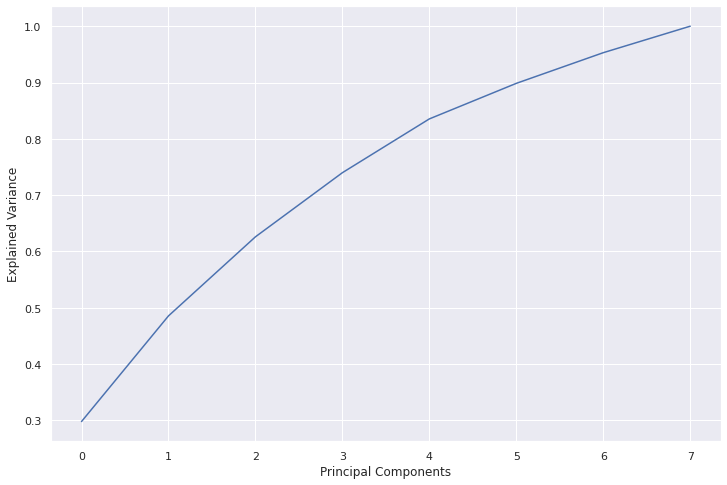

In [121]:
# plotting cumulative explained variance ratio
plt.figure(figsize=(12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance')
plt.show()

PC1 and PC2 contribute capture less than 50% of the variance. Ideally it should be 75-80% for a reliable representation of the data distribution but we shall still plot and see to get a rough idea.

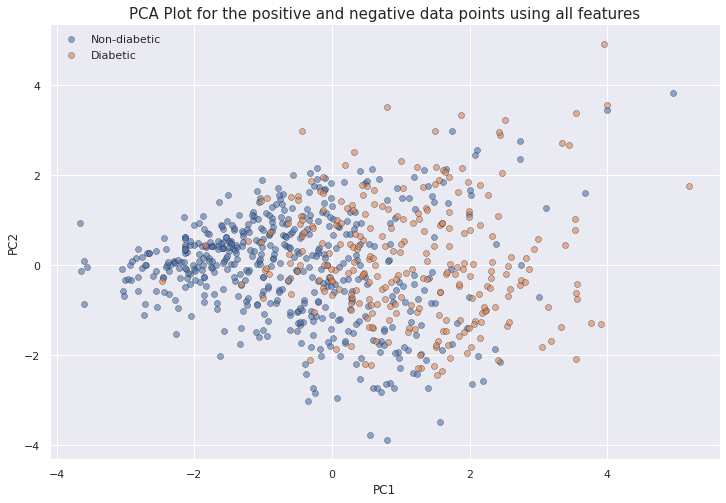

In [122]:
plt.figure(figsize=(12,8))
plt.scatter(X_pca[:,0][y[y == 0].index], X_pca[:,1][y[y == 0].index], label = 'Non-diabetic', alpha=0.6, linewidth=0.5, edgecolors='k')
plt.scatter(X_pca[:,0][y[y == 1].index], X_pca[:,1][y[y == 1].index], label = 'Diabetic', alpha=0.6, linewidth=0.5, edgecolors='k')
plt.title('PCA Plot for the positive and negative data points using all features', fontsize=15)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

We can see a slight difference in the distribution of the two groups, with the diabetics roughly occupying the right side of the distribution and majority of non-diabetics towards the left of the plot.

**Gentle Reminder:** This is only a rough distribution and doesn't represent the true distribution of the data in the 8 dimensional feature space since PC1 and PC2 capture around 50% of the variance.

In [123]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,102.5,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,32.0,169.5,30.1,0.349,47,1


In [239]:
# let's save the imputed dataframe
df.to_csv('Data/diabetes2.csv', index=False)

# <font color='palevioletred'>Since our EDA is now complete we can go for training machine learning models on our dataset in the next notebook!</font>